<a href="https://colab.research.google.com/github/leukschrauber/Assignments/blob/main/assignment_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment
*by Fabian Leuk (csba6437/12215478)*

The following assignment consists again of a theoretical part (learning portfolio) and a practical part (assignment). The goal is to train a neural model from scratch, as we did a few weeks ago. I would like us to repeat the most important things so that we can consolidate our knowledge in this area, for this you will train a model on a dataset that I will provide via OLAT.

The plan would be that in the first we will discuss your learnings from the theory part, that means you are relatively free to fill your Learning Portfolio on this topic and in the following week we will discuss your solutions of the Classification Model.

The following task is a binary classification task. The first column is our target. All variables are categorical variables from which you have to create dummy variables. The target column has only the property Q or F, which is to be modeled. As always, please create a train and a test data set, e.g. 80:20 or 90:10. Your goal is to create a neural network that best predicts the target column. Use probabilities with the sigmoid function as discussed in the theory. When designing your neural network, play with a few different numbers and sizes of layers and different activation functions.

To validate your model, you can compare your results with a logistic regression model. (Note: This data set should allow you to achieve very high accuracies: > 98% maybe even >99%) You can see how these results vary when you use 50% for testing and 50% for training.

## Data Preprocessing

As usual, we start with the data preprocessing. I transformed the labels myself to 0 and 1. Additionally, I dropped variable 15 as it only contains a single unique value and thus is not useful for any classification model. Then, I one-hot-encoded the remaining variables and splitted the data set in test, train and validation set using a stratified approach by the use of the target column.

In [28]:
import pandas as pd
import numpy as np
from google.colab import drive
import os
from google.colab import data_table
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

drive.mount('/content/gdrive', force_remount=True)

! [ -e /content ] && pip install -Uqq fastbook
import fastbook
from fastai.vision.all import *
from fastbook import *
fastbook.setup_book()

data_table.enable_dataframe_formatter()

Mounted at /content/gdrive


In [29]:
file = '/content/gdrive/My Drive/SE_Digital_Organizations/data_homework_6.csv'

data = pd.read_csv(file)

data.head(10)

,target,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,variable_18,variable_19,variable_20,variable_21,variable_22
0,Q,Y,T,O,U,Q,G,D,O,L,F,F,T,T,X,X,Q,X,P,Q,L,T,V
1,F,Y,T,Z,U,B,G,D,C,L,F,D,T,T,X,X,Q,X,P,Q,O,O,H
2,F,C,T,X,U,M,G,D,C,O,F,D,T,T,X,X,Q,X,P,Q,O,O,N
3,Q,Y,Z,X,U,Q,G,D,O,O,F,F,T,T,X,X,Q,X,P,Q,L,T,V
4,F,Y,T,H,G,O,G,X,C,L,U,F,T,T,X,X,Q,X,P,F,O,B,H
5,F,Y,Z,Z,U,B,G,D,C,O,F,D,T,T,X,X,Q,X,P,Q,L,O,H
6,F,C,T,X,U,B,G,D,C,H,F,D,T,T,X,X,Q,X,P,Q,L,O,N
7,F,C,Z,X,U,M,G,D,C,O,F,D,T,T,X,X,Q,X,P,Q,O,T,N
8,Q,Y,Z,X,U,Q,G,D,O,Q,F,F,T,T,X,X,Q,X,P,Q,L,W,H
9,F,C,T,Z,U,B,G,D,C,H,F,D,T,T,X,X,Q,X,P,Q,L,T,N


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   target       8124 non-null   object
 1   variable_1   8124 non-null   object
 2   variable_2   8124 non-null   object
 3   variable_3   8124 non-null   object
 4   variable_4   8124 non-null   object
 5   variable_5   8124 non-null   object
 6   variable_6   8124 non-null   object
 7   variable_7   8124 non-null   object
 8   variable_8   8124 non-null   object
 9   variable_9   8124 non-null   object
 10  variable_10  8124 non-null   object
 11  variable_11  8124 non-null   object
 12  variable_12  8124 non-null   object
 13  variable_13  8124 non-null   object
 14  variable_14  8124 non-null   object
 15  variable_15  8124 non-null   object
 16  variable_16  8124 non-null   object
 17  variable_17  8124 non-null   object
 18  variable_18  8124 non-null   object
 19  variable_19  8124 non-null 

In [31]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'target': ['Q' 'F']
Unique values in 'variable_1': ['Y' 'C' 'T' 'G' 'L' 'D']
Unique values in 'variable_2': ['T' 'Z' 'G' 'H']
Unique values in 'variable_3': ['O' 'Z' 'X' 'H' 'F' 'Q' 'C' 'V' 'D' 'S']
Unique values in 'variable_4': ['U' 'G']
Unique values in 'variable_5': ['Q' 'B' 'M' 'O' 'G' 'D' 'Z' 'T' 'N']
Unique values in 'variable_6': ['G' 'B']
Unique values in 'variable_7': ['D' 'X']
Unique values in 'variable_8': ['O' 'C']
Unique values in 'variable_9': ['L' 'O' 'H' 'Q' 'X' 'I' 'V' 'F' 'C' 'S' 'Z' 'P']
Unique values in 'variable_10': ['F' 'U']
Unique values in 'variable_11': ['F' 'D' 'C' 'S' 'Z']
Unique values in 'variable_12': ['T' 'G' 'L' 'Z']
Unique values in 'variable_13': ['T' 'G' 'Z' 'L']
Unique values in 'variable_14': ['X' 'H' 'Q' 'O' 'C' 'F' 'P' 'D' 'Z']
Unique values in 'variable_15': ['X' 'Q' 'H' 'C' 'O' 'F' 'Z' 'P' 'D']
Unique values in 'variable_16': ['Q']
Unique values in 'variable_17': ['X' 'O' 'P' 'Z']
Unique values in 'variable_18': ['P' 'U' 'O']


In [32]:
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for '{column}':\n{value_counts}")

Value counts for 'target':
F    4208
Q    3916
Name: target, dtype: int64
Value counts for 'variable_1':
Y    3656
G    3152
L     828
C     452
T      32
D       4
Name: variable_1, dtype: int64
Value counts for 'variable_2':
Z    3244
T    2556
G    2320
H       4
Name: variable_2, dtype: int64
Value counts for 'variable_3':
O    2284
H    1840
F    1500
Z    1072
X    1040
C     168
Q     144
D      44
V      16
S      16
Name: variable_3, dtype: int64
Value counts for 'variable_4':
G    4748
U    3376
Name: variable_4, dtype: int64
Value counts for 'variable_5':
O    3528
G    2160
Z     576
T     576
B     400
M     400
Q     256
D     192
N      36
Name: variable_5, dtype: int64
Value counts for 'variable_6':
G    7914
B     210
Name: variable_6, dtype: int64
Value counts for 'variable_7':
D    6812
X    1312
Name: variable_7, dtype: int64
Value counts for 'variable_8':
C    5612
O    2512
Name: variable_8, dtype: int64
Value counts for 'variable_9':
C    1728
Q    1492
X    1202

In [33]:
data = data.drop('variable_15', axis=1)

In [34]:
def transform_labels(x):
  x['target'] = x['target'].map({'F': 0, 'Q': 1})
  return x

In [35]:
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
 # one-hot-encoding for all columns but target
 ("cat", cat_pipeline, [col for col in data.columns.tolist() if col != 'target']),
  # reducing to boolean variable for target
 ("label", FunctionTransformer(transform_labels), ["target"]),
 ])


In [36]:
prepared_data = pd.DataFrame(preprocessing.fit_transform(data).toarray())

In [37]:
train_data, test_data = train_test_split(prepared_data, test_size=0.15, stratify=prepared_data[108], random_state=42)
train_data, validation_data = train_test_split(train_data, test_size=0.15, stratify=train_data[108], random_state=42)

(len(train_data), len(validation_data), len(test_data))

(5869, 1036, 1219)

In [38]:
def separate_labels_and_data(df):
  data_label = df[108].copy()
  df = df.drop([108], axis=1)
  return (df, data_label)

In [39]:
train_data, train_label = separate_labels_and_data(train_data)
valid_data, valid_label = separate_labels_and_data(validation_data)
test_data, test_label = separate_labels_and_data(test_data)

## Neural Network

### Training

I trief to train a neural network using different architectures and learning rates using rsme as the loss function and almost all of them yield a 100 % accuracy on the validation data set.

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.489498,0.474998,0.518340,00:00
1,0.441877,0.381448,0.901544,00:00
2,0.357544,0.268746,0.974903,00:00
3,0.267640,0.183297,0.995174,00:00
4,0.200235,0.134956,0.995174,00:00
5,0.149747,0.101176,0.999035,00:00
6,0.112738,0.077736,1.000000,00:00
7,0.086507,0.061900,1.000000,00:00
8,0.067382,0.049805,1.000000,00:00
9,0.053527,0.041144,1.000000,00:00


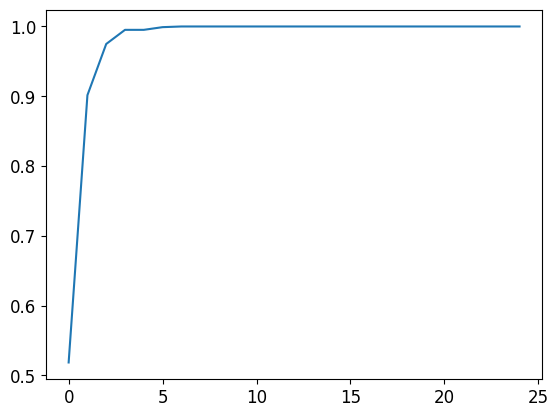

In [40]:
# Build the model: 108 -> 8 -> 3 -> Output
simple_net = nn.Sequential(
    nn.Linear(108,26),
    nn.ReLU(),
    nn.Linear(26,4),
    nn.ReLU(),
    nn.Linear(4,1),
)

# Accuracy function
def batch_accuracy(xb, yb):
    xb = xb.sigmoid()
    xb = xb.squeeze()
    correct = (xb>0.5) == yb
    return correct.double().mean()

# Loss function: Root Mean Squared Error
def rmse(predictions, targets):
    predictions = predictions.sigmoid()
    predictions=predictions.squeeze()
    squared_diff = torch.pow(predictions - targets, 2)
    mean_squared_diff = torch.mean(squared_diff)
    rmse = torch.sqrt(mean_squared_diff)

    return rmse

tensor_train_data = torch.from_numpy(train_data.values)
tensor_train_label = torch.tensor(train_label.values).squeeze()
tensor_valid_data = torch.from_numpy(valid_data.values)
tensor_valid_label = torch.tensor(valid_label.values).squeeze()

tensor_train_data = tensor_train_data.float()
tensor_train_label = tensor_train_label.float()
tensor_valid_data = tensor_valid_data.float()
tensor_valid_label = tensor_valid_label.float()


# The data sets and data loaders for both training and validation.
train_dl = DataLoader(list(zip(tensor_train_data,tensor_train_label)), batch_size=100)
valid_dl = DataLoader(list(zip(tensor_valid_data,tensor_valid_label)), batch_size=100)
dls = DataLoaders(train_dl, valid_dl)

# Learner takes test and validation dataset, the model, the SGD for optimization, 
# the minst_loss function for calculating the loss, the batch_accuracy for validation
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=rmse, metrics=batch_accuracy)
learn.fit(25, 0.1)
plt.plot(L(learn.recorder.values).itemgot(2));

### Testing

The trained model could also score 100 % accuracy on the test data set.

In [41]:
tensor_test_label = torch.tensor(test_label.values).squeeze()
tensor_test_label = tensor_test_label.int()

In [42]:
tensor_test_data = torch.from_numpy(test_data.values)
tensor_test_data = tensor_test_data.float()

# create a DataLoader for test data
test_dl = DataLoader(tensor_test_data, batch_size=1)

# use the model to make predictions on the test data
preds = learn.get_preds(dl=test_dl)

# round the predictions to the nearest integer (0 or 1)
preds = torch.tensor(preds[0])
preds = torch.sigmoid(preds)
preds = torch.round(preds)
preds = preds.int()

diff = tensor_test_label - preds
diff.sum()

<ipython-input-42-7797a35ee3f1>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds = torch.tensor(preds[0])


tensor(0)

## Logistic Regression

As suggested, I tried logistic regression to predict the targets. Again, 100 % accuracy on validation data set and test data set was scored.

In [43]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)

data_predictions = log_reg.predict(valid_data)

diff = tensor_valid_label - torch.from_numpy(data_predictions)
print(diff.sum())

data_predictions = log_reg.predict(test_data)

diff = tensor_test_label - torch.from_numpy(data_predictions)
print(diff.sum())


tensor(0., dtype=torch.float64)
tensor(0., dtype=torch.float64)
